# **Predicción de cancelación (churn)**

##Preparación de los datos

###Extracción del archivo tratado

In [30]:
import pandas as pd

df = pd.read_csv("telecomx_tratado.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Monthly,Total,Cuentas_Diarias,Churn
0,female,0,1,1,9,1,0.0,dsl,0.0,1.0,...,1.0,0.0,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3,2.186667,No
1,male,0,0,0,9,1,1.0,dsl,0.0,0.0,...,0.0,1.0,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4,1.996667,No
2,male,0,0,0,4,1,0.0,fiber optic,0.0,0.0,...,0.0,0.0,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85,2.463333,Yes
3,male,1,1,0,13,1,0.0,fiber optic,0.0,1.0,...,1.0,1.0,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85,3.266667,Yes
4,female,1,1,0,3,1,0.0,fiber optic,0.0,0.0,...,1.0,0.0,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4,2.796667,Yes


###Eliminación de columnas irrelevantes

In [31]:
df = df.drop(columns=["Charges"], errors="ignore")

print("Columnas después de la limpieza:")
print(df.columns.tolist())

Columnas después de la limpieza:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total', 'Cuentas_Diarias', 'Churn']


In [32]:
print(df.dtypes)
print(df.isnull().sum())

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total                object
Cuentas_Diarias     float64
Churn                object
dtype: object
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod 

In [33]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Total'] = df['Total'].fillna(df['Total'].median())
df = df.dropna(subset=['Churn'])
print(df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
Cuentas_Diarias     0
Churn               0
dtype: int64


###Encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


cat_cols = df.select_dtypes(include=['object','category']).columns.drop('Churn')
#OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
#Ajustar y transformar (recordar que el fit sólo aprende y el transform transforma)
encoded = encoder.fit_transform(df[cat_cols])
#Pasar a DataFrame con nombres y mismo índice
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=df.index)
#Unimos: numéricas + dummies + el target q es el churn intacto
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)
#q todas sean 1 y 0 sin deciaml
df_encoded = df_encoded.astype(int, errors="ignore")

print("Shape antes:", df.shape, "| después:", df_encoded.shape)
df_encoded.head()


Shape antes: (7043, 21) | después: (7043, 32)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Monthly,Total,Cuentas_Diarias,Churn,gender_male,...,StreamingTV_1.0,StreamingTV_no internet service,StreamingMovies_1.0,StreamingMovies_no internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,9,1,65,593,2,No,0,...,1,0,0,0,1,0,1,0,0,1
1,0,0,0,9,1,59,542,1,No,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,4,1,73,280,2,Yes,1,...,0,0,0,0,0,0,1,0,1,0
3,1,1,0,13,1,98,1237,3,Yes,1,...,1,0,1,0,0,0,1,0,1,0
4,1,1,0,3,1,83,267,2,Yes,0,...,1,0,0,0,0,0,1,0,0,1


###Verificación de la proporción de cancelación (Churn)

In [35]:
conteo = df['Churn'].value_counts()

proporcion = df['Churn'].value_counts(normalize=True)

conteo, proporcion

(Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 Churn
 No     0.73463
 Yes    0.26537
 Name: proportion, dtype: float64)

In [36]:
#1 de cada 4 cancela, así q la más importante va a ser la sensi bilidad (recall) ya q el accuracy va a achuntar un 73# de las veces si dice q no

###Balanceo de clases

No apliqué balanceo porque la distribución de la clase objetivo es ~**73% No / 27% Sí**, lo que no representa un desbalance severo.  
Para mitigar sesgos sin alterar la muestra:
- Usé **estratificación** en el `train_test_split`.
- Apliqué **`class_weight="balanced"`** en modelos como **Regresión Logística** y **árboles** (Decision Tree / Random Forest).
- En evaluación, prioricé **Recall** y **F1** de la clase 1 (churn).

> Si el objetivo fuese maximizar aún más el recall, podría añadirse **SMOTE** o **ajuste de umbral** sobre probabilidades.


In [53]:
y.value_counts().rename_axis('Churn').to_frame('count').assign(
    proportion=lambda d: (d['count'] / d['count'].sum()).round(5)
)


,count,proportion
Churn,,
0,5174,0.73463
1,1869,0.26537


###Normalización o estandarización ( de ser necesario )

Dependiendo de los modelos elegidos más adelante, aplicaré normalización. Si uso Regresión Logística o KNN será necesaria; si uso Random Forest o Decision Tree no será necesario.

Finalmente, se optó por aplicar normalización únicamente en los modelos sensibles a la escala (Regresión Logística y KNN), mientras que los modelos basados en árboles (Decision Tree y Random Forest) fueron entrenados sin este preprocesamiento, siguiendo las mejores prácticas.

In [52]:
from sklearn.preprocessing import StandardScaler

#seleccionamos las variables q son numéricas
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

#iniciamos el escalador
scaler = StandardScaler()

#ajustamos y transformamos los datos numéricos
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("Primeras filas después de la normalización:")
df_scaled.head()

Primeras filas después de la normalización:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Monthly,Total,Cuentas_Diarias,Churn,gender_male,...,StreamingTV_1.0,StreamingTV_no internet service,StreamingMovies_1.0,StreamingMovies_no internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,1.034530,1.529024,-0.951682,0.327438,0.023399,-0.745411,0.364294,-0.601023,-1.009559,...,1.265612,-0.525927,-0.796070,-0.525927,1.944582,-0.562975,0.829798,-0.525047,-0.711026,1.835513
1,-0.439916,-0.966622,-0.654012,-0.951682,0.327438,-0.175998,-0.767926,-0.546828,-0.601023,0.990532,...,-0.790132,-0.525927,1.256171,-0.525927,-0.514249,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,0.289263,-0.883594,0.364294,1.663829,0.990532,...,-0.790132,-0.525927,-0.796070,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
3,2.273159,1.034530,-0.654012,-0.788800,0.327438,1.120088,-0.461098,1.275415,1.663829,0.990532,...,1.265612,-0.525927,1.256171,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
4,2.273159,1.034530,-0.654012,-1.196004,0.327438,0.621593,-0.889333,0.364294,1.663829,-1.009559,...,1.265612,-0.525927,-0.796070,-0.525927,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513


##Correlación y selección de variables

###Análisis de recorrelación

In [39]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

df_encoded['Churn'] = df['Churn']

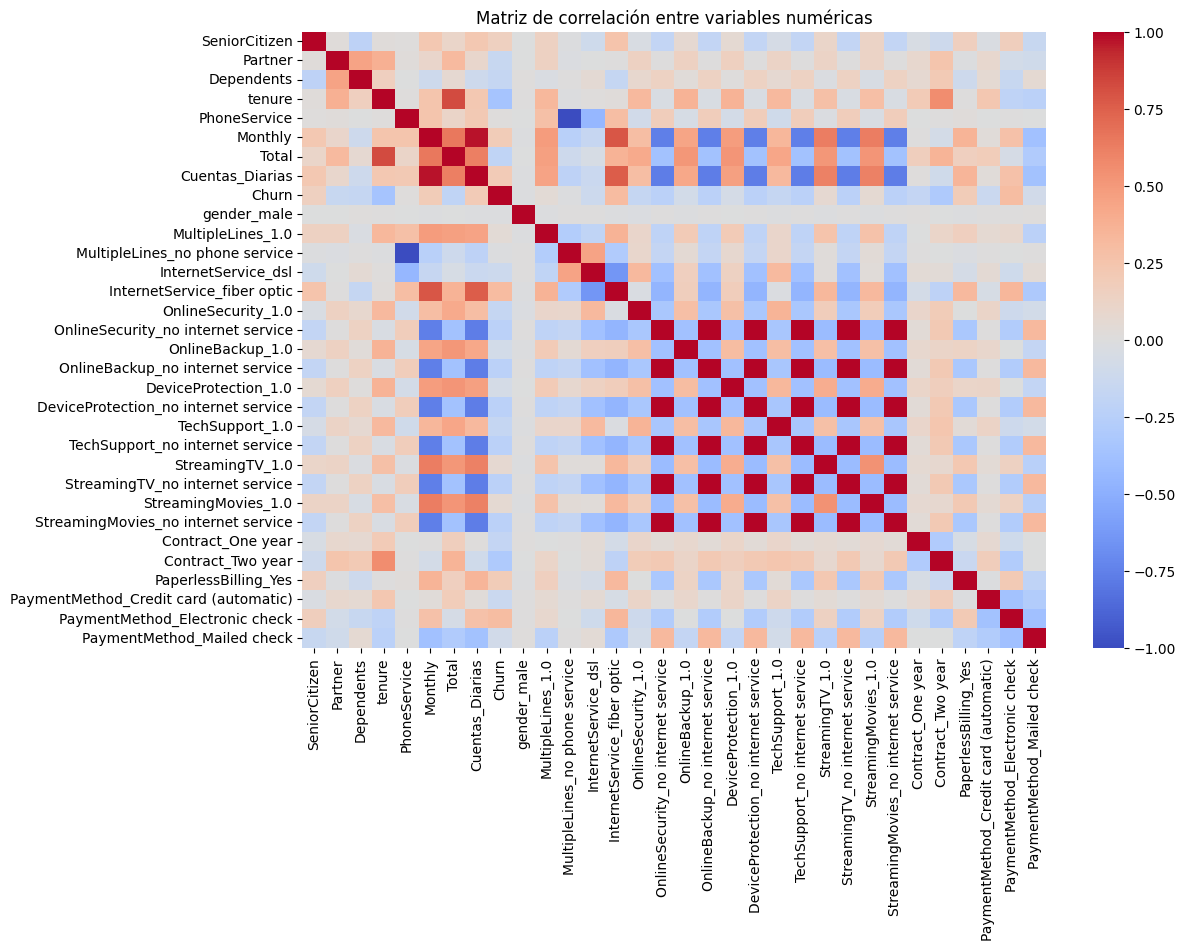

Correlación de cada variable con Churn:
Churn                                    1.000000
InternetService_fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Cuentas_Diarias                          0.196095
Monthly                                  0.193422
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_1.0                          0.063228
StreamingMovies_1.0                      0.061382
MultipleLines_1.0                        0.040102
PhoneService                             0.011942
gender_male                             -0.008612
MultipleLines_no phone service          -0.011942
DeviceProtection_1.0                    -0.066160
OnlineBackup_1.0                        -0.082255
PaymentMethod_Mailed check              -0.091683
InternetService_dsl                     -0.124214
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

#matriz de correlación
corr = df_encoded[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

#correlación directa con churn
corr_churn = corr[df['Churn'].name].sort_values(ascending=False)
print("Correlación de cada variable con Churn:")
print(corr_churn)


In [41]:
""" El análisis de correlación muestra que variables como fibra óptica, pago con cheque electrónico y mayor gasto mensual se asocian con mayor probabilidad de cancelación. En cambio, mayor permanencia (tenure), contratos largos y uso de servicios adicionales (seguridad, soporte, etc.) reducen significativamente la probabilidad de churn. """

' El análisis de correlación muestra que variables como fibra óptica, pago con cheque electrónico y mayor gasto mensual se asocian con mayor probabilidad de cancelación. En cambio, mayor permanencia (tenure), contratos largos y uso de servicios adicionales (seguridad, soporte, etc.) reducen significativamente la probabilidad de churn. '

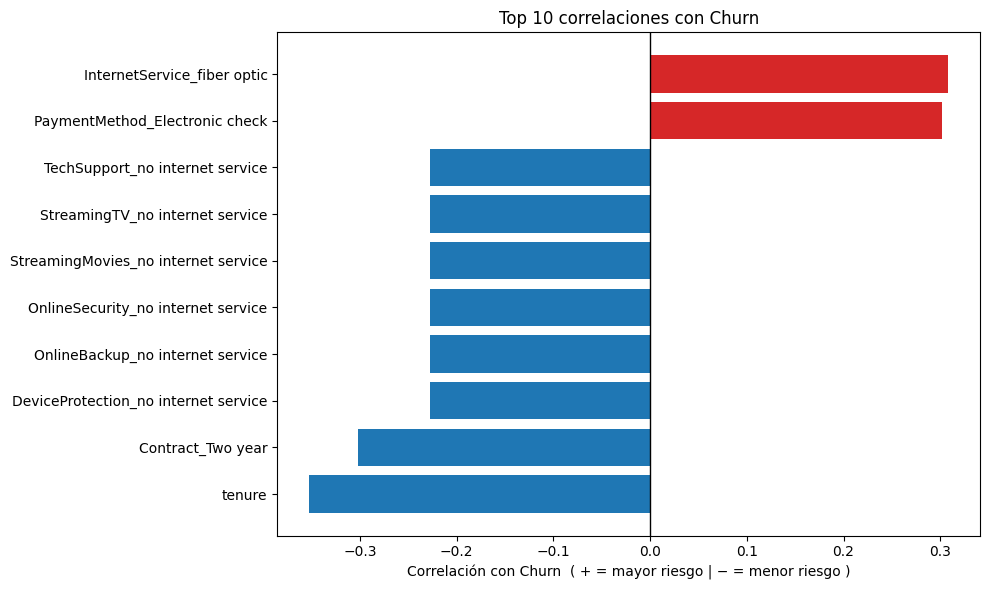

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# (Re)calcular correlación si hace falta
num_cols = df_encoded.select_dtypes(include=['int64','float64']).columns
corr = df_encoded[num_cols].corr()

# Correlación con Churn (excluye la propia Churn)
corr_with_churn = corr['Churn'].drop('Churn')

# Top 10 por valor absoluto, pero conservando el signo
top_idx = corr_with_churn.abs().sort_values(ascending=False).head(10).index
top_signed = corr_with_churn.loc[top_idx].sort_values()  # ordenado para leer mejor

# Colores por signo: negativo = retiene (azul), positivo = riesgo (rojo)
colors = ['tab:blue' if v < 0 else 'tab:red' for v in top_signed.values]

plt.figure(figsize=(10,6))
plt.barh(top_signed.index, top_signed.values, color=colors)
plt.axvline(0, color='k', linewidth=1)
plt.title("Top 10 correlaciones con Churn")
plt.xlabel("Correlación con Churn  ( + = mayor riesgo | − = menor riesgo )")
plt.tight_layout()
plt.show()

###Análisis dirigido

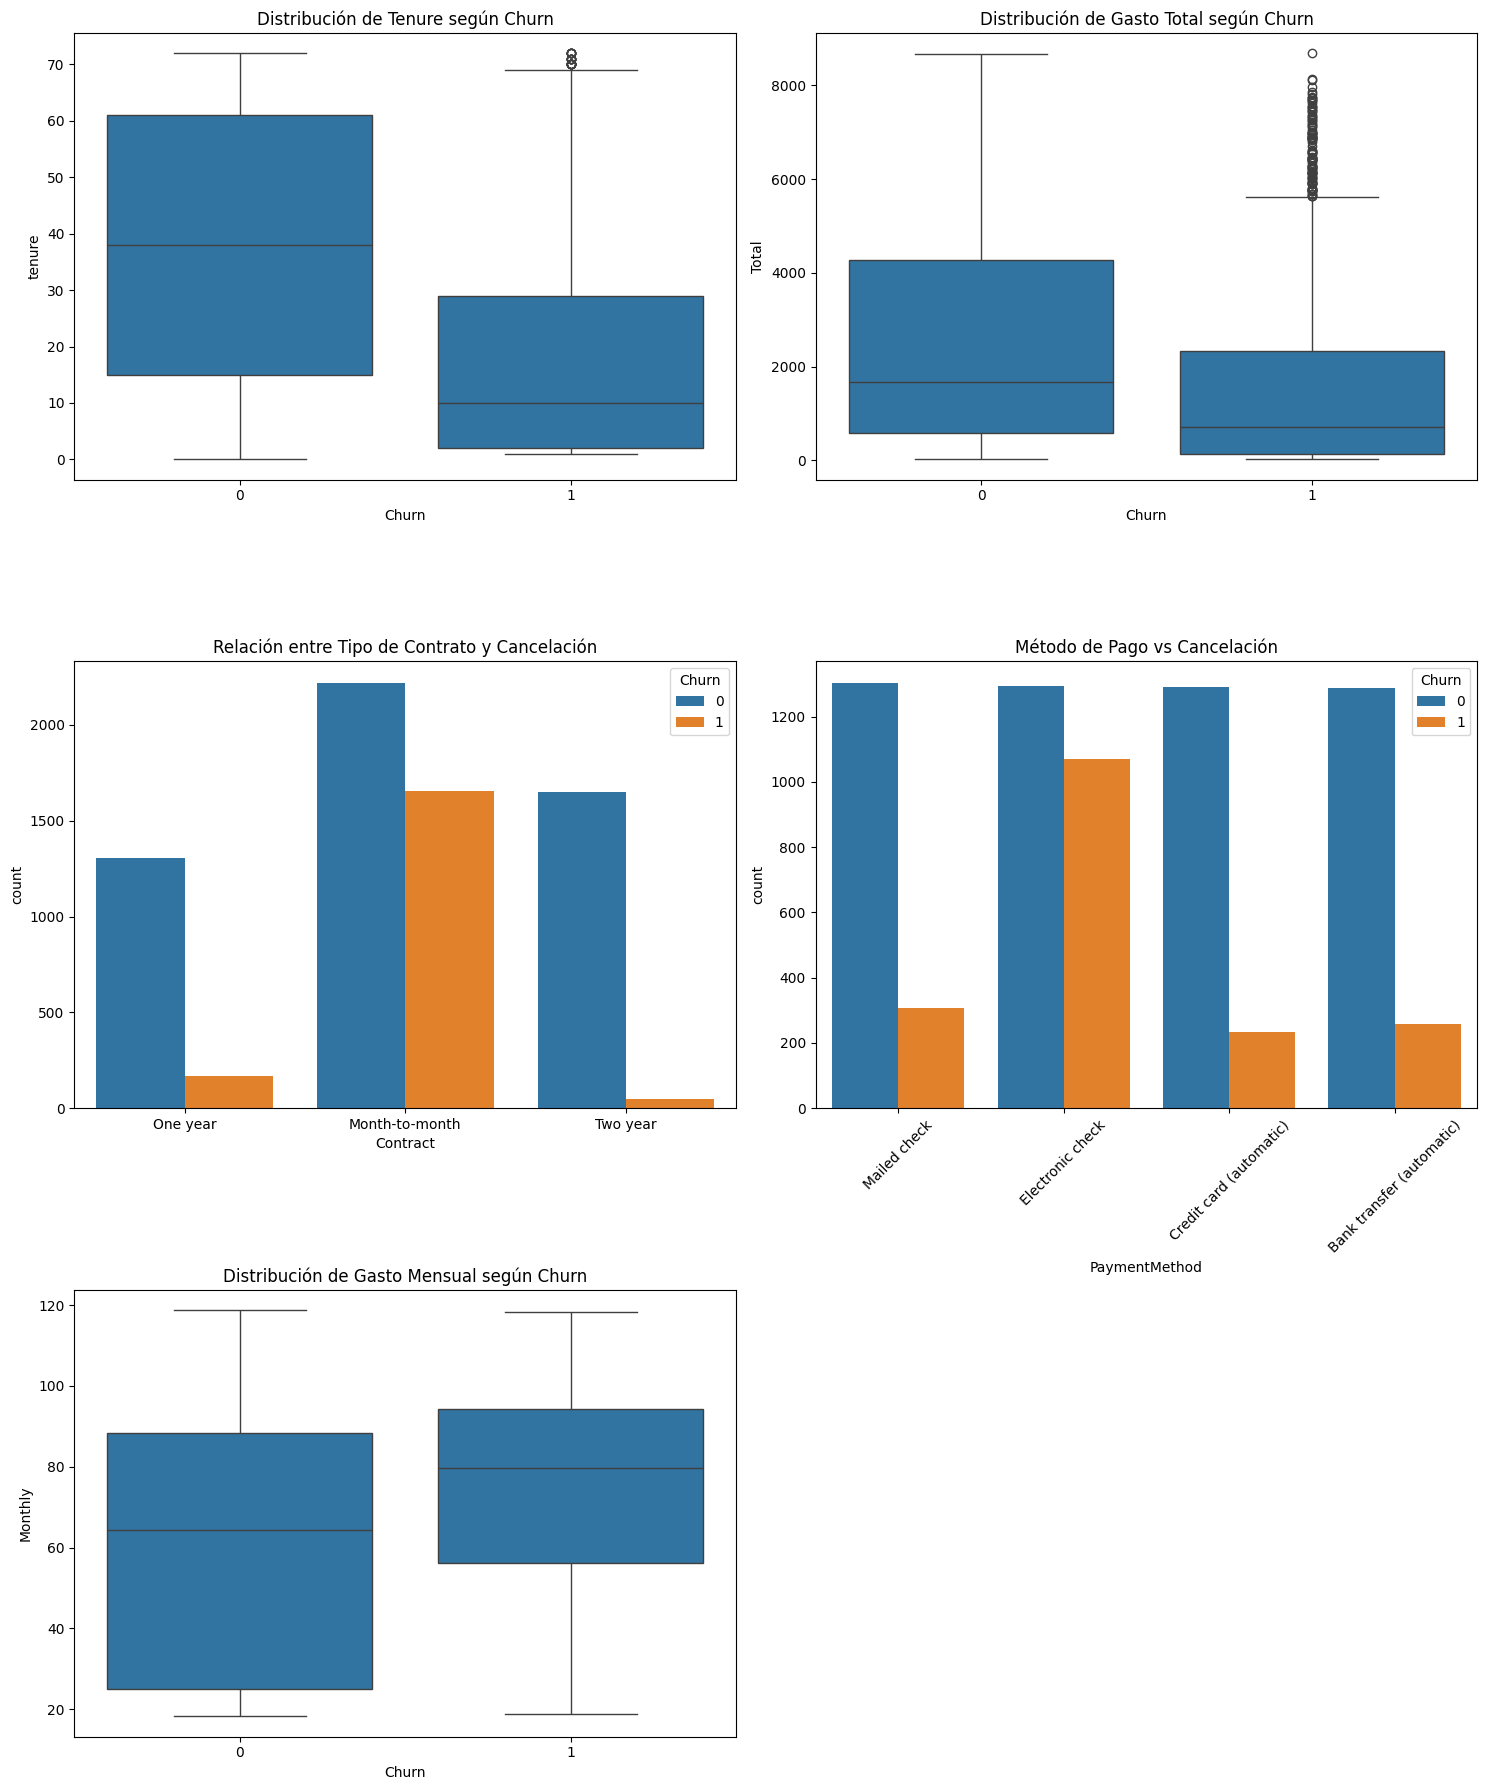

In [43]:
import seaborn as sns

plt.figure(figsize=(15,18))

plt.subplot(3,2,1)
sns.boxplot(x=df['Churn'], y=df['tenure'])
plt.title("Distribución de Tenure según Churn")

plt.subplot(3,2,2)
sns.boxplot(x=df['Churn'], y=df['Total'])
plt.title("Distribución de Gasto Total según Churn")

plt.subplot(3,2,3)
sns.countplot(x=df['Contract'], hue=df['Churn'])
plt.title("Relación entre Tipo de Contrato y Cancelación")

plt.subplot(3,2,4)
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'])
plt.xticks(rotation=45)
plt.title("Método de Pago vs Cancelación")

plt.subplot(3,2,5)
sns.boxplot(x=df['Churn'], y=df['Monthly'])
plt.title("Distribución de Gasto Mensual según Churn")

plt.tight_layout()
plt.show()

In [44]:
#Factores de riesgo de cancelación: contratos mes a mes, pagos con electronic check, cuotas mensuales altas y baja antigüedad.

#Factores de retención: contratos largos, alto gasto total y métodos de pago automáticos.

##Modelado predictivo

###Separación de datos

In [45]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)
print("Proporción en y_train:", y_train.value_counts(normalize=True))
print("Proporción en y_test:", y_test.value_counts(normalize=True))


Tamaño del set de entrenamiento: (5634, 31)
Tamaño del set de prueba: (1409, 31)
Proporción en y_train: Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Proporción en y_test: Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


###Creación de modelos

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    "Regresión Logística (escala)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
    ]),
    "KNN (escala)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=15))
    ]),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=6, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced", random_state=42)
}

#Entrenar
for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

#Evaluar
def eval_print(name, model):
    ytr = model.predict(X_train)
    yte = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Train:",
          f"Acc {accuracy_score(y_train, ytr):.3f}",
          f"Prec {precision_score(y_train, ytr):.3f}",
          f"Rec {recall_score(y_train, ytr):.3f}",
          f"F1 {f1_score(y_train, ytr):.3f}")
    print("Test :",
          f"Acc {accuracy_score(y_test, yte):.3f}",
          f"Prec {precision_score(y_test, yte):.3f}",
          f"Rec {recall_score(y_test, yte):.3f}",
          f"F1 {f1_score(y_test, yte):.3f}")
    print("Matriz de confusión (Test):\n", confusion_matrix(y_test, yte))
    print("Reporte de clasificación (Test):\n", classification_report(y_test, yte))

for name, model in models.items():
    eval_print(name, model)


=== Regresión Logística (escala) ===
Train: Acc 0.752 Prec 0.521 Rec 0.811 F1 0.634
Test : Acc 0.742 Prec 0.509 Rec 0.791 F1 0.620
Matriz de confusión (Test):
 [[750 285]
 [ 78 296]]
Reporte de clasificación (Test):
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409


=== KNN (escala) ===
Train: Acc 0.815 Prec 0.666 Rec 0.610 F1 0.637
Test : Acc 0.780 Prec 0.594 Rec 0.540 F1 0.566
Matriz de confusión (Test):
 [[897 138]
 [172 202]]
Reporte de clasificación (Test):
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70  

###Evaluación de los modelos

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar(modelo, Xtr, ytr, Xte, yte, nombre):
    y_pred_tr = modelo.predict(Xtr)
    y_pred_te = modelo.predict(Xte)
    print(f"\n=== {nombre} ===")
    print("Train: ",
          "Acc:", round(accuracy_score(ytr, y_pred_tr), 3),
          "Prec:", round(precision_score(ytr, y_pred_tr, pos_label=1), 3),
          "Rec:", round(recall_score(ytr, y_pred_tr, pos_label=1), 3),
          "F1:", round(f1_score(ytr, y_pred_tr, pos_label=1), 3))
    print("Test : ",
          "Acc:", round(accuracy_score(yte, y_pred_te), 3),
          "Prec:", round(precision_score(yte, y_pred_te, pos_label=1), 3),
          "Rec:", round(recall_score(yte, y_pred_te, pos_label=1), 3),
          "F1:", round(f1_score(yte, y_pred_te, pos_label=1), 3))
    print("\nMatriz de confusión (Test):\n", confusion_matrix(yte, y_pred_te))
    print("\nReporte de clasificación (Test):\n", classification_report(yte, y_pred_te))


log_reg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])
log_reg_model.fit(X_train, y_train)

knn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=15))
])
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(max_depth=6, class_weight="balanced", random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)


evaluar(log_reg_model, X_train, y_train, X_test, y_test, "Regresión Logística (con escalado)")
evaluar(knn_model,     X_train, y_train, X_test, y_test, "KNN (con escalado)")
evaluar(dt_model,      X_train, y_train, X_test, y_test, "Árbol de Decisión")
evaluar(rf_model,      X_train, y_train, X_test, y_test, "Random Forest")


=== Regresión Logística (con escalado) ===
Train:  Acc: 0.752 Prec: 0.521 Rec: 0.811 F1: 0.634
Test :  Acc: 0.742 Prec: 0.509 Rec: 0.791 F1: 0.62

Matriz de confusión (Test):
 [[750 285]
 [ 78 296]]

Reporte de clasificación (Test):
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409


=== KNN (con escalado) ===
Train:  Acc: 0.815 Prec: 0.666 Rec: 0.61 F1: 0.637
Test :  Acc: 0.78 Prec: 0.594 Rec: 0.54 F1: 0.566

Matriz de confusión (Test):
 [[897 138]
 [172 202]]

Reporte de clasificación (Test):
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1409
   

GRÁFICO COMPARATIVO DE LOS 4 MODELOS

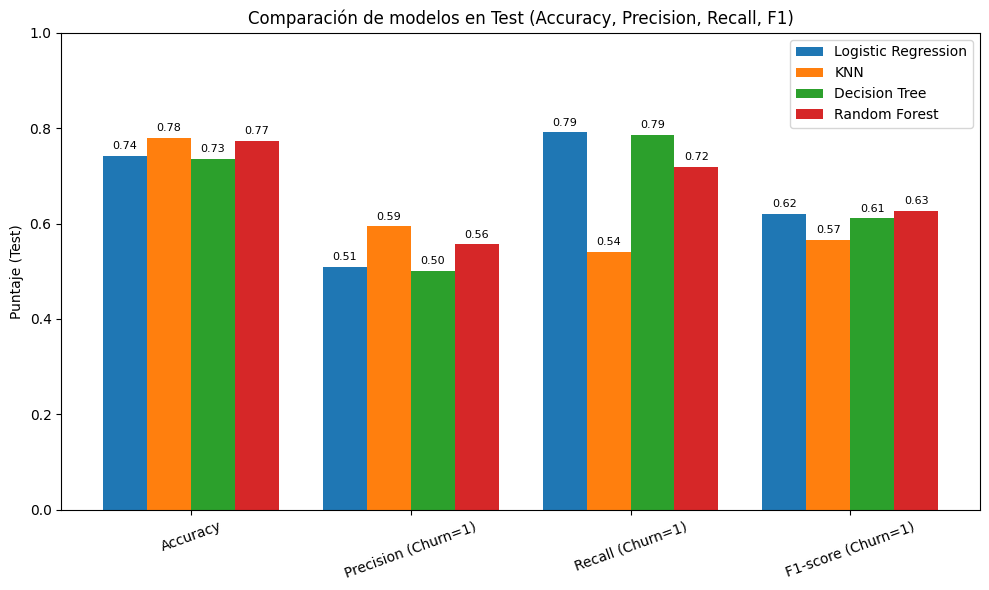

In [49]:
metrics = ["Accuracy", "Precision (Churn=1)", "Recall (Churn=1)", "F1-score (Churn=1)"]

scores = {
    "Logistic Regression": [0.742, 0.509, 0.791, 0.620],
    "KNN":                  [0.780, 0.594, 0.540, 0.566],
    "Decision Tree":        [0.735, 0.500, 0.786, 0.611],
    "Random Forest":        [0.773, 0.556, 0.719, 0.627],
}

x = np.arange(len(metrics))
width = 0.2
model_names = list(scores.keys())
values = np.array(list(scores.values()))

plt.figure(figsize=(10,6))
for i, name in enumerate(model_names):
    plt.bar(x + (i-1.5)*width, values[i], width, label=name)

for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        xpos = x[j] + (i-1.5)*width
        ypos = values[i, j]
        plt.text(xpos, ypos + 0.01, f"{ypos:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks(x, metrics, rotation=20)
plt.ylim(0, 1.0)
plt.ylabel("Puntaje (Test)")
plt.title("Comparación de modelos en Test (Accuracy, Precision, Recall, F1)")
plt.legend()
plt.tight_layout()
plt.show()

##Interpretación y conclusiones

###Análisis de la importancia de las variables

Top 10 que AUMENTAN el churn (coeficiente +):
Total                             0.592577
InternetService_fiber optic       0.343592
StreamingTV_1.0                   0.219196
PaymentMethod_Electronic check    0.198443
MultipleLines_1.0                 0.178232
StreamingMovies_1.0               0.175105
PaperlessBilling_Yes              0.168462
SeniorCitizen                     0.079738
MultipleLines_no phone service    0.019097
DeviceProtection_1.0              0.016296
Name: Coeficiente, dtype: float64 

Top 10 que REDUCEN el churn (coeficiente -):
tenure                                 -1.265652
Contract_Two year                      -0.612656
Monthly                                -0.465007
Contract_One year                      -0.287524
InternetService_dsl                    -0.248379
Cuentas_Diarias                        -0.175404
TechSupport_1.0                        -0.139098
OnlineSecurity_no internet service     -0.128506
TechSupport_no internet service        -0.128506
De

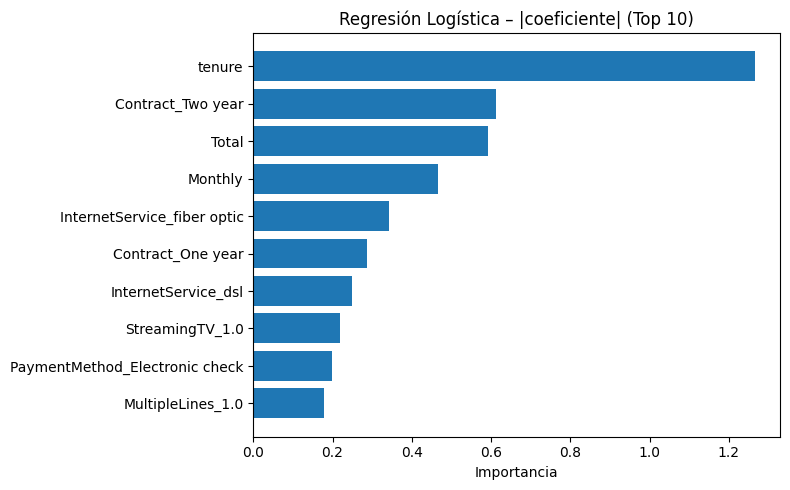

Árbol – Top 10 importancias:
 Contract_Two year                   0.372650
Contract_One year                   0.235129
tenure                              0.129667
InternetService_fiber optic         0.091643
Total                               0.043652
StreamingMovies_1.0                 0.027519
PaymentMethod_Electronic check      0.023934
Monthly                             0.021259
OnlineBackup_no internet service    0.017974
PhoneService                        0.009202
Name: Importancia, dtype: float64 



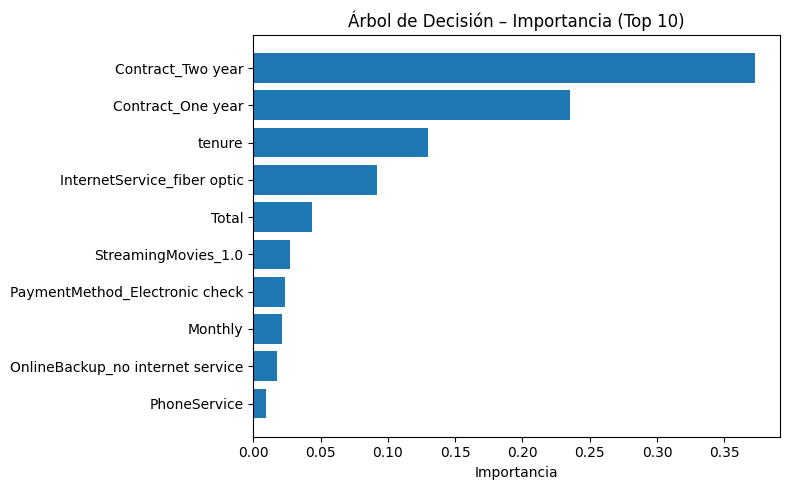

Random Forest – Top 10 importancias:
 tenure                            0.177051
Total                             0.150138
Contract_Two year                 0.099719
Monthly                           0.074591
InternetService_fiber optic       0.056799
PaymentMethod_Electronic check    0.054317
Contract_One year                 0.040832
TechSupport_1.0                   0.027235
OnlineSecurity_1.0                0.025464
InternetService_dsl               0.022599
Name: Importancia, dtype: float64 



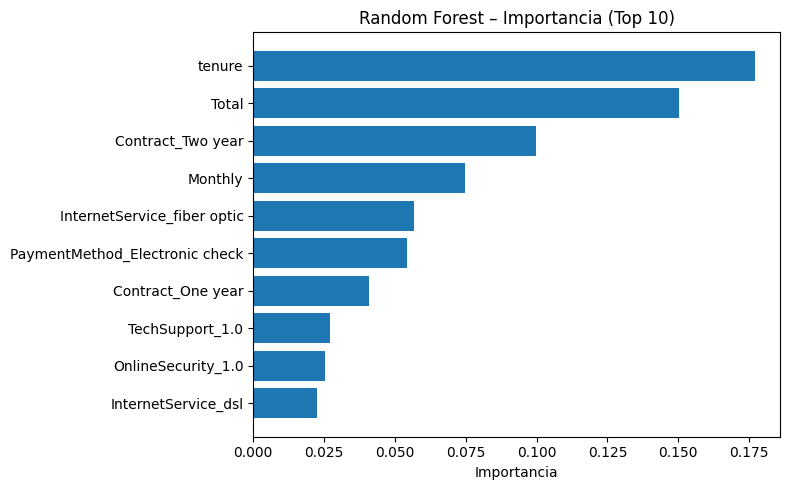

KNN (Permutation) – Top 10 importancias:
 tenure                         0.014478
Total                          0.012633
Contract_One year              0.010433
InternetService_dsl            0.007665
OnlineSecurity_1.0             0.005820
StreamingMovies_1.0            0.005252
InternetService_fiber optic    0.004755
MultipleLines_1.0              0.004400
PaperlessBilling_Yes           0.003974
Monthly                        0.002981
Name: Importancia, dtype: float64 



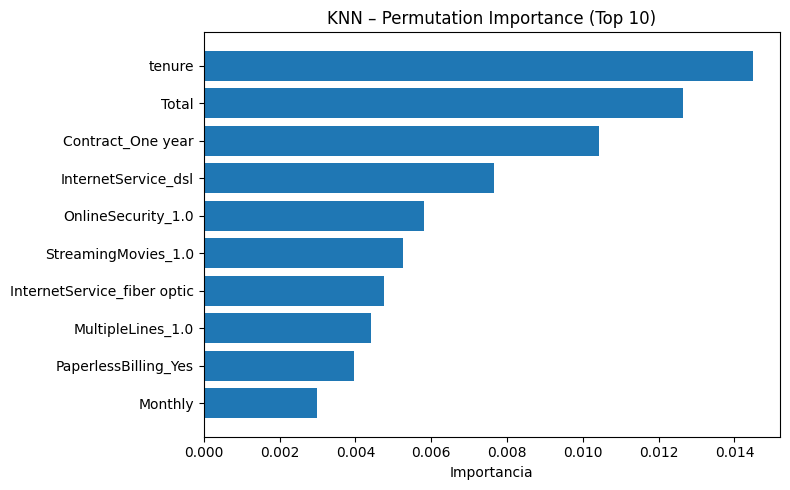

In [50]:
from sklearn.inspection import permutation_importance

def plot_top_importances(series, title, top=10):
    s = series.sort_values(ascending=False).head(top)[::-1]
    plt.figure(figsize=(8,5))
    plt.barh(s.index, s.values)
    plt.title(title)
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()

#Regresión Logística: coeficientes (signo = dirección del efecto)
lr_clf = log_reg_model.named_steps["clf"]
lr_coef = pd.Series(lr_clf.coef_[0], index=X_train.columns, name="Coeficiente")

print("Top 10 que AUMENTAN el churn (coeficiente +):")
print(lr_coef.sort_values(ascending=False).head(10), "\n")
print("Top 10 que REDUCEN el churn (coeficiente -):")
print(lr_coef.sort_values().head(10), "\n")

#Gráficos (positivo y negativo por separado)
plot_top_importances(lr_coef.abs(), "Regresión Logística – |coeficiente| (Top 10)", top=10)

#Árbol de Decisión: feature_importances_
dt_import = pd.Series(dt_model.feature_importances_, index=X_train.columns, name="Importancia")
print("Árbol – Top 10 importancias:\n", dt_import.sort_values(ascending=False).head(10), "\n")
plot_top_importances(dt_import, "Árbol de Decisión – Importancia (Top 10)", top=10)

#Random Forest: feature_importances_
rf_import = pd.Series(rf_model.feature_importances_, index=X_train.columns, name="Importancia")
print("Random Forest – Top 10 importancias:\n", rf_import.sort_values(ascending=False).head(10), "\n")
plot_top_importances(rf_import, "Random Forest – Importancia (Top 10)", top=10)

#KNN: Permutation Importance (en Test para interpretar sobre datos no vistos)
perm_knn = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
knn_import = pd.Series(perm_knn.importances_mean, index=X_train.columns, name="Importancia")
print("KNN (Permutation) – Top 10 importancias:\n", knn_import.sort_values(ascending=False).head(10), "\n")
plot_top_importances(knn_import, "KNN – Permutation Importance (Top 10)", top=10)


Regresión Logística: evidenció que un mayor gasto total y contar con servicio de fibra óptica, junto con métodos de pago como electronic check, aumentan significativamente la probabilidad de churn. En contraste, la antigüedad (tenure) y los contratos a largo plazo (1 o 2 años) reducen el riesgo de cancelación de manera considerable.

Árbol de Decisión: identificó como variables clave la duración del contrato, especialmente el de dos años (que actúa como fuerte protector), seguido por tenure y servicio de fibra óptica, lo que coincide con la regresión logística.

Random Forest: reforzó la importancia de tenure, Total gastado, tipo de contrato y método de pago como determinantes principales. También destacó el peso de variables de seguridad como TechSupport y OnlineSecurity.

KNN (Permutation Importance): mostró un patrón similar, donde tenure, Total y Contract_One year emergen como los factores más relevantes para diferenciar clientes que cancelan de los que permanecen.

En conjunto, los resultados indican que los clientes con mayor antigüedad y contratos de más largo plazo presentan menor probabilidad de cancelar, mientras que aquellos con altos gastos, fibra óptica y métodos de pago electrónicos son los que concentran mayor riesgo de evasión.

###Informe final

####Introducción

Fuimos contratados por la empresa Telecom X con el objetivo de comprender en profundidad las causas del abandono de clientes (churn) y proponer soluciones predictivas que permitan reducir (y predecir) este fenómeno. Para esta segunda fase del proyecto, trabajamos con el conjunto de datos previamente tratado en la primera parte del desafío, lo que garantizó información limpia, sin inconsistencias y lista para el modelado.

El proceso comenzó con la preparación de los datos, donde eliminamos columnas irrelevantes como identificadores únicos, realizamos la codificación de variables categóricas mediante OneHotEncoder, verificamos la proporción de cancelación (aprox. 26.5% de los clientes abandonaron el servicio) y confirmamos que no era necesario aplicar técnicas de balanceo adicionales. Posteriormente, realizamos un análisis de correlación, que evidenció relaciones significativas entre la cancelación y variables como tipo de contrato, gasto total y tiempo de permanencia (tenure). A esto se sumó un análisis dirigido, en el que visualizamos gráficamente la relación entre el churn y factores clave como el gasto mensual, el contrato y el soporte técnico.

Con base en estas etapas exploratorias y de preparación, avanzamos a la construcción de modelos predictivos. Seleccionamos un enfoque mixto que incluye modelos que requieren normalización (Regresión Logística y KNN) y modelos no sensibles a la escala (Árbol de Decisión y Random Forest). De esta manera, pudimos evaluar distintas metodologías y comparar su desempeño en la tarea de anticipar la cancelación de clientes.

####Desarrollo

Como mencionamos anteriormente, en este proyecto trabajamos con el dataset tratado previamente en la Parte 1, el cual ya había pasado por una etapa de limpieza y corrección. Como primer paso, eliminamos columnas irrelevantes como identificadores y campos redundantes, para quedarnos únicamente con la información útil para el modelado. También convertimos los valores de gasto total a formato numérico, imputamos los valores faltantes con la mediana (para no perder información relevante) y nosaseguramos que la variable objetivo Churn quedara en formato binario (0 = cliente que permanece, 1 = cliente que cancela).

Posteriormente, transformamos las variables categóricas gracias a OneHotEncoder, lo que nos permitió integrarlas de manera adecuada en los algoritmos de machine learning. El dataset final quedó compuesto por variables numéricas y categóricas codificadas, listo para los modelos predictivos.

Antes de entrenar, verificamos la proporción de cancelaciones. Encontramos que aproximadamente el 26% de los clientes cancelan, mientras que un 74% permanece activo. Aunque existe un desbalance, decidimos no aplicar técnicas de balanceo, ya que no era extremo y preferimos conservar la distribución natural de los datos. En cuanto a la normalización, tomamos la decisión de aplicarla únicamente en los modelos sensibles a la escala, como Regresión Logística y KNN, mientras que los modelos basados en árboles (Decision Tree y Random Forest) se trabajaron sin escalado, ya que no dependen de las magnitudes de las variables.

Al analizar las correlaciones, observamos patrones interesantes: los clientes con contratos más largos y mayor antigüedad presentan una tasa de cancelación mucho menor. En contraste, aquellos con internet de fibra óptica, métodos de pago tipo “electronic check” y gastos mensuales elevados mostraron mayor probabilidad de cancelar. Además, al profundizar en el análisis dirigido, confirmamos que los clientes con contratos mes a mes y con bajo gasto acumulado tienden a abandonar más, mientras que quienes contratan planes anuales o de dos años permanecen en la compañía.

Con los datos listos, separamos la muestra en un 80% para entrenamiento y 20% para prueba, manteniendo la proporción de cancelaciones. A continuación, entrenamos cuatro modelos:

- Regresión Logística (con normalización),

- KNN (con normalización),

- Árbol de Decisión y

- Random Forest.

Los resultados mostraron diferencias relevantes. La Regresión Logística y el Árbol de Decisión se destacaron por su alto recall, es decir, su capacidad para detectar a la mayoría de los clientes que efectivamente cancelan. Por su parte, el Random Forest ofreció un equilibrio más robusto entre precisión y recall, mientras que KNN tuvo un rendimiento aceptable, pero más débil al momento de identificar cancelaciones. En resumen:

Si el objetivo es no perder clientes en riesgo (recall alto), Regresión Logística y Árbol de Decisión son muy competitivos.

Si el objetivo es un equilibrio entre captar clientes en riesgo y minimizar falsos positivos, Random Forest resulta la mejor opción.

Finalmente, analizamos la importancia de las variables en cada modelo. La evidencia fue consistente:

La antigüedad del cliente (tenure) y los contratos a largo plazo reducen significativamente la probabilidad de cancelación.

Variables como fibra óptica, método de pago electronic check y gastos mensuales altos aumentan el riesgo de abandono.

El gasto total acumulado también juega un papel relevante en todos los modelos.

####Conclusión

El análisis realizado permitió identificar los principales factores que influyen en la cancelación de clientes en Telecom X. A lo largo del proyecto preparamos los datos, entrenamos y evaluamos distintos modelos predictivos (Regresión Logística, KNN, Árbol de Decisión y Random Forest), lo que nos entregó una visión amplia y comparativa sobre el comportamiento de los clientes.

En términos de desempeño, los modelos basados en árboles (especialmente Random Forest) lograron un buen equilibrio entre precisión y recall, siendo capaces de captar de manera más robusta a los clientes con alto riesgo de cancelación. Los modelos basados en distancia y regresión también ofrecieron resultados valiosos, destacando en su capacidad para revelar patrones en variables con gran peso, aunque con mayor sensibilidad a la escala.

En cuanto a las variables más influyentes, observamos que tenure (tiempo de permanencia), tipo de contrato, método de pago electrónico y el servicio de fibra óptica son factores decisivos en la cancelación. Clientes con contratos a corto plazo, pagos electrónicos y servicios de fibra óptica mostraron mayor propensión a darse de baja, mientras que la permanencia más prolongada y los contratos de dos años actuaron como factores protectores contra la cancelación.

Con base en estos hallazgos, recomendamos a Telecom X implementar estrategias de retención focalizadas:

- Ofrecer incentivos para extender contratos a largo plazo.

- Diseñar planes de fidelización dirigidos a clientes con servicios de fibra óptica.

- Revisar políticas y facilidades en métodos de pago electrónico (especialmente el cheque)

- Potenciar el soporte técnico y servicios adicionales que aumenten la percepción de valor del cliente.

En conjunto, los modelos predictivos desarrollados no solo permitieron anticipar la cancelación, sino también proveer información estratégica para la toma de decisiones, orientando a la empresa hacia acciones preventivas que favorezcan la retención y reduzcan la pérdida de clientes.